In [13]:
import numpy as np
import random

def step(rels, pb, pr, pn):
    baby_index = random.randrange(0,N)
    parent_index = random.choice(range(0, baby_index) + range(baby_index+1, N)) # excludes dead index
    
    #killing the guy. he is not a friend of anybody now
    rels[:,baby_index] = np.zeros(N) 
    rels[baby_index] = np.zeros(N) 
    
    parent_friends_indexes = np.where(rels[parent_index]==1)[0].tolist()
#     x = set(range(0,N))
#     y = x - set(parent_friends_indexes)
    for i in parent_friends_indexes:

        if i == baby_index:
            continue # it's me .. i am not friend of myself...am i?

        if i == parent_index:
            if random.random()<pb: 
                rels[baby_index,i] = 1
                rels[i,baby_index] = 1
            continue

        if i in parent_friends_indexes:
            if random.random()<pn: 
                rels[baby_index,i] = 1
                rels[i,baby_index] = 1
            continue

        #else
        if random.random()<pr:
            rels[baby_index,i] = 1
            rels[i,baby_index] = 1

    
    


In [14]:
%%time
def run(pb, pr, pn):
    # init population
    rels = np.zeros((N,N))

    #run steps
    for _ in xrange(steps):
        step(rels,pb, pr, pn)

    return sum([sum(row) for row in rels])/N #degree

N = 100
steps = 2000
pb = 1

pr = 0.5
pr05 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr05

pr = 0.3
pr03 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr03

pr = 0.1
pr01 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr01

[32.34, 34.56, 35.26, 37.88, 38.5, 39.82, 41.6, 44.14, 46.02, 46.6, 49.46, 52.86, 56.0, 58.66, 62.8, 66.72, 70.44, 76.12, 83.08, 90.7, 99.0]
[22.86, 24.16, 25.08, 26.44, 27.64, 30.04, 30.1, 31.96, 32.82, 36.24, 38.18, 39.4, 43.96, 45.56, 49.68, 56.38, 61.0, 67.64, 74.96, 84.82, 99.0]
[9.82, 10.06, 10.6, 10.86, 11.5, 12.7, 14.16, 14.66, 14.04, 16.72, 17.68, 19.14, 23.26, 24.32, 27.26, 28.44, 36.9, 41.58, 52.3, 70.26, 97.0]
CPU times: user 12.4 s, sys: 51.6 ms, total: 12.5 s
Wall time: 12.5 s


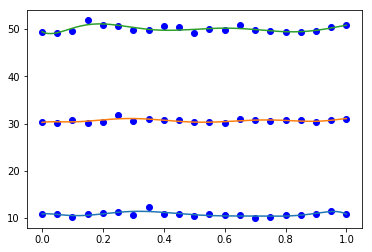

In [3]:
%matplotlib inline
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def drawFor(x,y):
    for x1, y1 in zip(x, y):
        plt.plot(x1, y1, 'bo')
    x_new = np.linspace(x[0], x[-1], num=len(x)*10)
    coefs = poly.polyfit(x, y, 8)
    ffit = poly.polyval(x_new, coefs)
    plt.plot(x_new, ffit)

drawFor(np.arange(0,1.05,0.05),pr01)
drawFor(np.arange(0,1.05,0.05),pr03)
drawFor(np.arange(0,1.05,0.05),pr05)
plt.show()